# Project 3 -- Youngjun Suh

**TA Help:** John Smith, Alice Jones

- Help with figuring out how to write a function.
    
**Collaboration:** Friend1, Friend2
    
- Helped figuring out how to load the dataset.
- Helped debug error with my plot.

Takeaways: ?command will show all the functionalities and parameters of this command and how to use them properly.
Ex: ?head
    shows all the related usages of head and decriptions.

In [2]:
options(jupyter.rich_display = F)

In [3]:
list.files("/anvil/projects/tdm/data/disney")

 [1] "7_dwarfs_train.csv"                "alien_saucers.csv"                
 [3] "dinosaur.csv"                      "entities.csv"                     
 [5] "expedition_everest.csv"            "flight_of_passage.csv"            
 [7] "kilimanjaro_safaris.csv"           "metadata.csv"                     
 [9] "navi_river.csv"                    "pirates_of_caribbean.csv"         
[11] "rock_n_rollercoaster.csv"          "slinky_dog.csv"                   
[13] "soarin.csv"                        "spaceship_earth.csv"              
[15] "splash_mountain.csv"               "total.parquet"                    
[17] "touringplans_data_dictionary.xlsx" "toy_story_mania.csv"              
[19] "update.py"                        

In [4]:
myDF <- read.csv("/anvil/projects/tdm/data/disney/7_dwarfs_train.csv", stringsAsFactors = TRUE)

In [5]:
file.info("/anvil/projects/tdm/data/disney/7_dwarfs_train.csv")$size

[1] 11696214

file.info command-data type
------------------------------------------------
size- double: File size in bytes.
isdir- logical: Is the file a directory?
mode- integer of class "octmode". The file permissions, printed in octal, for example 644.
mtime, ctime, atime- integer of class "POSIXct": file modification, ‘last status change’ and last access times.
uid- integer: the user ID of the file’s owner.
gid- integer: the group ID of the file’s group.
uname- character: uid interpreted as a user name. grname
character: gid interpreted as a group name. Unknown user and group names will be NA.

## Question 1

look at how many rows, how many columns, the type of data, etc.
Use the head command to look at the first 21 rows.

In [6]:
dim(myDF)

[1] 321631      4

In [7]:
str(myDF)

'data.frame':	321631 obs. of  4 variables:
 $ date    : Factor w/ 2334 levels "01/01/2015","01/01/2016",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ datetime: Factor w/ 321586 levels "2015-01-01 07:51:12",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ SACTMIN : int  NA NA 54 NA NA 55 NA NA NA NA ...
 $ SPOSTMIN: int  45 60 NA 60 60 NA 60 60 90 105 ...


In [8]:
class(myDF$date)
class(myDF$datetime)
class(myDF$SACTMIN)
class(myDF$SPOSTMIN)

[1] "factor"

[1] "factor"

[1] "integer"

[1] "integer"

In [9]:
head(myDF, n=21)

   date       datetime            SACTMIN SPOSTMIN
1  01/01/2015 2015-01-01 07:51:12 NA       45     
2  01/01/2015 2015-01-01 08:02:13 NA       60     
3  01/01/2015 2015-01-01 08:05:30 54       NA     
4  01/01/2015 2015-01-01 08:09:12 NA       60     
5  01/01/2015 2015-01-01 08:16:12 NA       60     
6  01/01/2015 2015-01-01 08:22:16 55       NA     
7  01/01/2015 2015-01-01 08:23:12 NA       60     
8  01/01/2015 2015-01-01 08:29:12 NA       60     
9  01/01/2015 2015-01-01 08:37:13 NA       90     
10 01/01/2015 2015-01-01 08:44:11 NA      105     
11 01/01/2015 2015-01-01 08:50:33 NA      105     
12 01/01/2015 2015-01-01 08:51:12 NA      105     
13 01/01/2015 2015-01-01 09:02:13 NA      105     
14 01/01/2015 2015-01-01 09:09:16 NA      105     
15 01/01/2015 2015-01-01 09:16:12 NA      120     
16 01/01/2015 2015-01-01 09:23:12 NA      120     
17 01/01/2015 2015-01-01 09:29:12 NA      120     
18 01/01/2015 2015-01-01 09:34:32 NA      120     
19 01/01/2015 2015-01-01 09:37:

There are 321631 rows and 4 columns in this dataframe.
4 columns consists of date, datetime, SACTMIN, SPOSTMIN.
date has factor as its data type, and datetime has factor, and SACTMIN has integer, and SPOSTMIN has integer.

## Question 2

If we are looking at the column "SPOSTMIN" what do you notice about the increments of time? I.e., is there anything special about the types of values that appear? How many different wait time options do you see in "SPOSTMIN"?

How many NA values do you see in "SPOSTMIN"?

Create a new data frame with the name newDF in which the "SPOSTMIN" column has all NA values removed. In other words, select the rows of myDF for which "SPOSTMIN" is not NA and call the resulting data.frame by the name newDF.

In [16]:
table(myDF$SPOSTMIN, useNA="always")


 -999     0     5    10    15    20    25    30    35    40    45    50    55 
23062    32   897  1306   914  3638  2166 13939  4894 14941 15149 19555  6989 
   60    65    70    75    80    85    90    95   100   105   110   115   120 
29034 10345 23496 12101 22971  5301 23813  6853 10773  8164 11909  3000 13097 
  125   130   135   140   145   150   155   160   165   170   175   180   185 
 1954  5982  1723  4151   940  3793   394  1739   520  1031   272  1644   163 
  190   195   200   205   210   215   220   225   230   235   240   250   260 
  375   128   249   100   257    11    88    26    26    17    37    17    10 
  270   280   300  <NA> 
    6     2     2  7635 

In [14]:
summary(myDF$SPOSTMIN)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-999.000   45.000   70.000   -2.064   95.000  300.000     7635 

In [22]:
mean(myDF$SPOSTMIN, na.rm=TRUE)

[1] -2.063539

In [26]:
head(is.na(myDF$SPOSTMIN), n=21)

 [1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

is.na makes the data's elements into true or false based on whether its element is na or not.

In [10]:
newDF <- subset(myDF, !is.na(myDF$SPOSTMIN))

In [24]:
head(newDF, n=21)

   date       datetime            SACTMIN SPOSTMIN
1  01/01/2015 2015-01-01 07:51:12 NA       45     
2  01/01/2015 2015-01-01 08:02:13 NA       60     
4  01/01/2015 2015-01-01 08:09:12 NA       60     
5  01/01/2015 2015-01-01 08:16:12 NA       60     
7  01/01/2015 2015-01-01 08:23:12 NA       60     
8  01/01/2015 2015-01-01 08:29:12 NA       60     
9  01/01/2015 2015-01-01 08:37:13 NA       90     
10 01/01/2015 2015-01-01 08:44:11 NA      105     
11 01/01/2015 2015-01-01 08:50:33 NA      105     
12 01/01/2015 2015-01-01 08:51:12 NA      105     
13 01/01/2015 2015-01-01 09:02:13 NA      105     
14 01/01/2015 2015-01-01 09:09:16 NA      105     
15 01/01/2015 2015-01-01 09:16:12 NA      120     
16 01/01/2015 2015-01-01 09:23:12 NA      120     
17 01/01/2015 2015-01-01 09:29:12 NA      120     
18 01/01/2015 2015-01-01 09:34:32 NA      120     
19 01/01/2015 2015-01-01 09:37:12 NA       80     
20 01/01/2015 2015-01-01 09:44:11 NA       80     
21 01/01/2015 2015-01-01 09:51:

The time increments only by a factor of 5.
There are 7635 NA values in the column of SPOSTMIN.

## Question 3

On Christmas day, what was the average wait time? On July 26th, what was the average wait time?

Is there a difference between the wait times in the summer and the holidays?

On which date do the most entries occur in the data set?

In [30]:
length(myDF$date[myDF$date=="12/28/2021"])

[1] 158

In [24]:
mean(myDF$SACTMIN[myDF$date=="12/25/2021"], na.rm=TRUE)

[1] 48

In [23]:
mean(myDF$SACTMIN[myDF$date=="07/26/2021"], na.rm=TRUE)

[1] 39.6

In [22]:
mean(myDF$SPOSTMIN[myDF$date=="12/28/2021"], na.rm=TRUE)

[1] 22.60784

Let's first pick a day for the summer time: August 15th. Probably the hottest day during summer time.
Now, pick a holiday: Jan 1st.

In [25]:
mean(myDF$SPOSTMIN[myDF$date=="01/01/2021"], na.rm=TRUE)

[1] 81.14407

In [26]:
mean(myDF$SPOSTMIN[myDF$date=="08/15/2021"], na.rm=TRUE)

[1] 46.27559

There is 81.14407-46.27559=34.86848 difference between these two days' waiting time.

In [29]:
head(sort(table(myDF$date), decreasing=TRUE))


11/08/2021 10/01/2021 11/09/2021 10/29/2021 10/15/2021 10/10/2021 
       363        359        344        333        332        330 

There are about 363 entries for 11/08/2021

## Question 4

Find the lengths of the column "SPOSTMIN" in the myDF and newDF.

Create a new vector called myhours by adding together "SPOSTMIN" columns from myDF and newDF with each divided by 60. What is the length of that new vector myhours?

What happened in row 313997? why?

In [30]:
length(myDF$SPOSTMIN)

[1] 321631

In [31]:
length(newDF$SPOSTMIN)

[1] 313996

length of the vector from newDF is shorter than that of myDF

In [32]:
myhours <- (newDF$SPOSTMIN + myDF$SPOSTMIN)/60

Warning message in newDF$SPOSTMIN + myDF$SPOSTMIN:
"longer object length is not a multiple of shorter object length"


In [41]:
myDF$SPOSTMIN[313997]/60

[1] 0.25

In [45]:
newDF$SPOSTMIN[313997]/60 
# no more data and result in returning the first data (like how overflow happens in JAVA) and This is called recycling in R
# This is probably the reason why the warning message also said length of one object is not the multiple of that of the other.
# This means that if it were to be the multiple of the other,
# then R will calculate these objects as if the longer object is a collection of multiple objects with length of shorter one.

[1] NA

In [43]:
myhours[313997]

[1] 1

## Question 5

Consider the average wait times. What day of the week in myDF has the longest average wait time?

Make a plot and a dotchart that illustrate the data for the average wait times. Which one conveys the information better and why?

We created a new column in myDF that shows the weekdays. Do the same thing for part (a) and (b) again, but this time using the months instead of the days of the week.

In [46]:
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [47]:
myDF$weekday <- wday(myDF$datetime, label=TRUE)

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."


In [48]:
head(myDF)

  date       datetime            SACTMIN SPOSTMIN weekday
1 01/01/2015 2015-01-01 07:51:12 NA      45       Thu    
2 01/01/2015 2015-01-01 08:02:13 NA      60       Thu    
3 01/01/2015 2015-01-01 08:05:30 54      NA       Thu    
4 01/01/2015 2015-01-01 08:09:12 NA      60       Thu    
5 01/01/2015 2015-01-01 08:16:12 NA      60       Thu    
6 01/01/2015 2015-01-01 08:22:16 55      NA       Thu    

In [51]:
mean(myDF$SACTMIN[myDF$weekday == "Mon" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 37.92959

In [50]:
head(sort(myDF$SACTMIN))

[1] -92918      0      0      0      0      0

In [52]:
mean(myDF$SACTMIN[myDF$weekday == "Tue" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 34.55502

In [53]:
mean(myDF$SACTMIN[myDF$weekday == "Wed" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 36.44053

In [54]:
mean(myDF$SACTMIN[myDF$weekday == "Thu" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 36.17215

In [55]:
mean(myDF$SACTMIN[myDF$weekday == "Fri" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 36.12491

In [56]:
mean(myDF$SACTMIN[myDF$weekday == "Sat" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 37.73216

In [57]:
mean(myDF$SACTMIN[myDF$weekday == "Sun" & myDF$SACTMIN != -92918], na.rm=TRUE)

[1] 34.90372

Monday has the longest average wait time just by 0.19743 sec difference from that on Sat.

tapply function, which has 3 parameters. (with options at the end as to how to process the data given)
data you want to work on, how to break the data into group, what to do on each group.

In [58]:
tapply(myDF$SACTMIN, myDF$weekday, mean, na.rm=TRUE)

      Sun       Mon       Tue       Wed       Thu       Fri       Sat 
 34.90372 -72.86412  34.55502  36.44053  36.17215  36.12491  37.73216 

We can also apply conditions on our data.

In [60]:
tapply(myDF$SACTMIN[myDF$SACTMIN != -92918], myDF$weekday[myDF$SACTMIN != -92918], mean, na.rm=TRUE)

     Sun      Mon      Tue      Wed      Thu      Fri      Sat 
34.90372 37.92959 34.55502 36.44053 36.17215 36.12491 37.73216 

In [69]:
myresult <- tapply(myDF$SACTMIN[myDF$SACTMIN != -92918],
                   myDF$weekday[myDF$SACTMIN != -92918],
                   mean,
                   na.rm=TRUE)

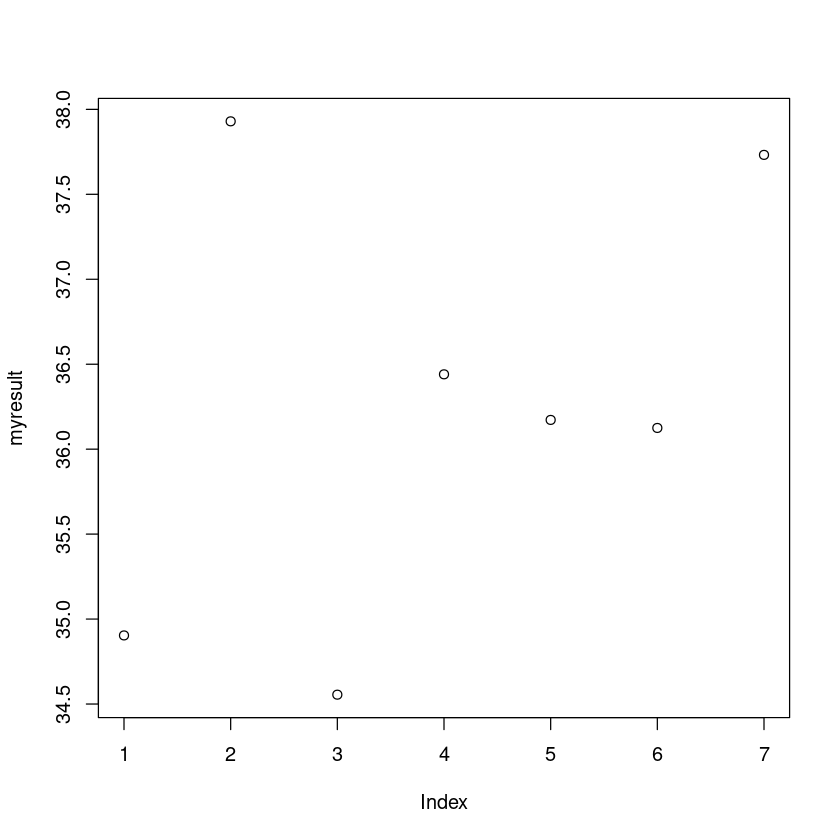

In [62]:
plot(myresult)

Warning message in dotchart(myresult):
"'x' is neither a vector nor a matrix: using as.numeric(x)"


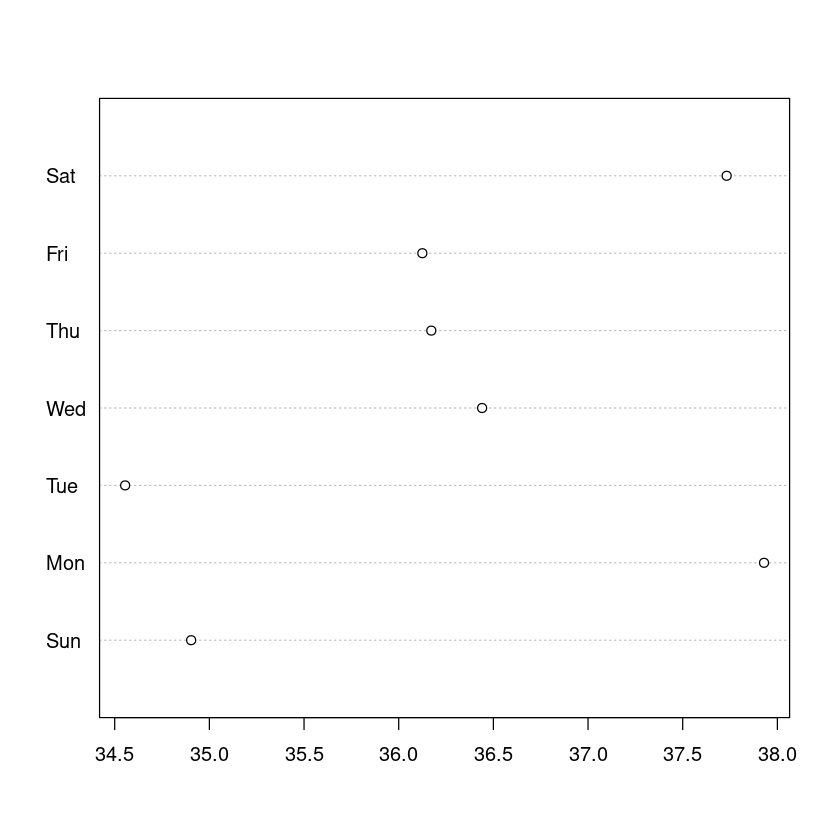

In [63]:
dotchart(myresult)

Dotchart is better because it's showing the label of each day instead of numbers.

In [64]:
myDF$month <- month(myDF$datetime, label=TRUE)

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."


In [65]:
head(myDF)

  date       datetime            SACTMIN SPOSTMIN weekday month
1 01/01/2015 2015-01-01 07:51:12 NA      45       Thu     Jan  
2 01/01/2015 2015-01-01 08:02:13 NA      60       Thu     Jan  
3 01/01/2015 2015-01-01 08:05:30 54      NA       Thu     Jan  
4 01/01/2015 2015-01-01 08:09:12 NA      60       Thu     Jan  
5 01/01/2015 2015-01-01 08:16:12 NA      60       Thu     Jan  
6 01/01/2015 2015-01-01 08:22:16 55      NA       Thu     Jan  

In [67]:
tapply(myDF$SACTMIN[myDF$SACTMIN != -92918],
                   myDF$month[myDF$SACTMIN != -92918],
                   mean,
                   na.rm=TRUE)

     Jan      Feb      Mar      Apr      May      Jun      Jul      Aug 
41.64757 43.62733 38.50000 34.66873 35.36293 39.98100 36.83942 32.08961 
     Sep      Oct      Nov      Dec 
26.98632 33.45165 37.98672 37.74623 

In [68]:
myresult02 <- tapply(myDF$SACTMIN[myDF$SACTMIN != -92918],
                   myDF$month[myDF$SACTMIN != -92918],
                   mean,
                   na.rm=TRUE)

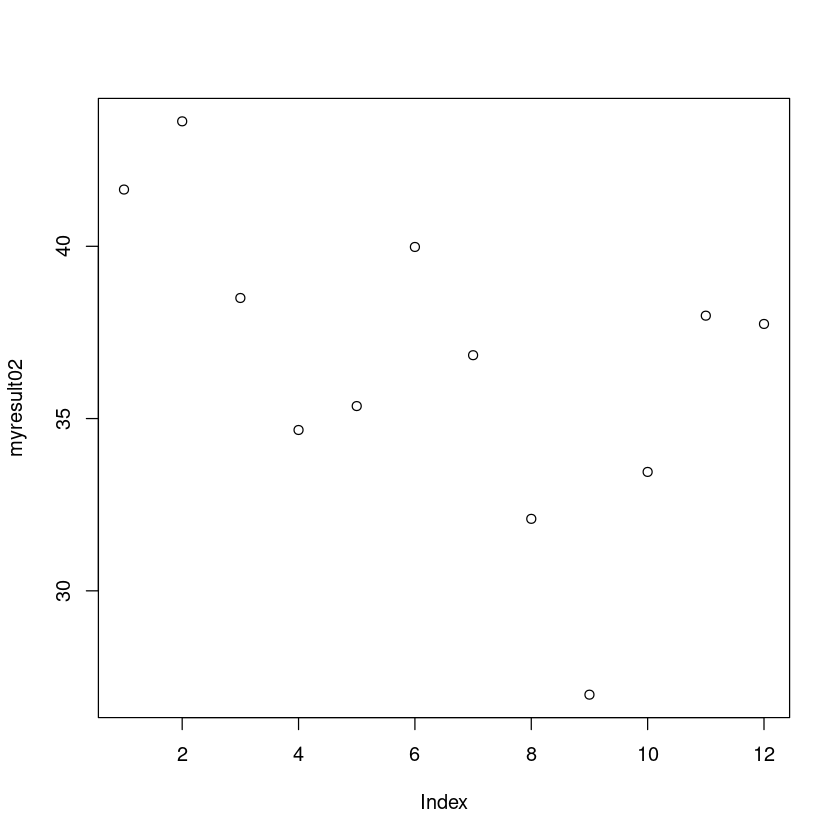

In [70]:
plot(myresult02)

Warning message in dotchart(myresult02):
"'x' is neither a vector nor a matrix: using as.numeric(x)"


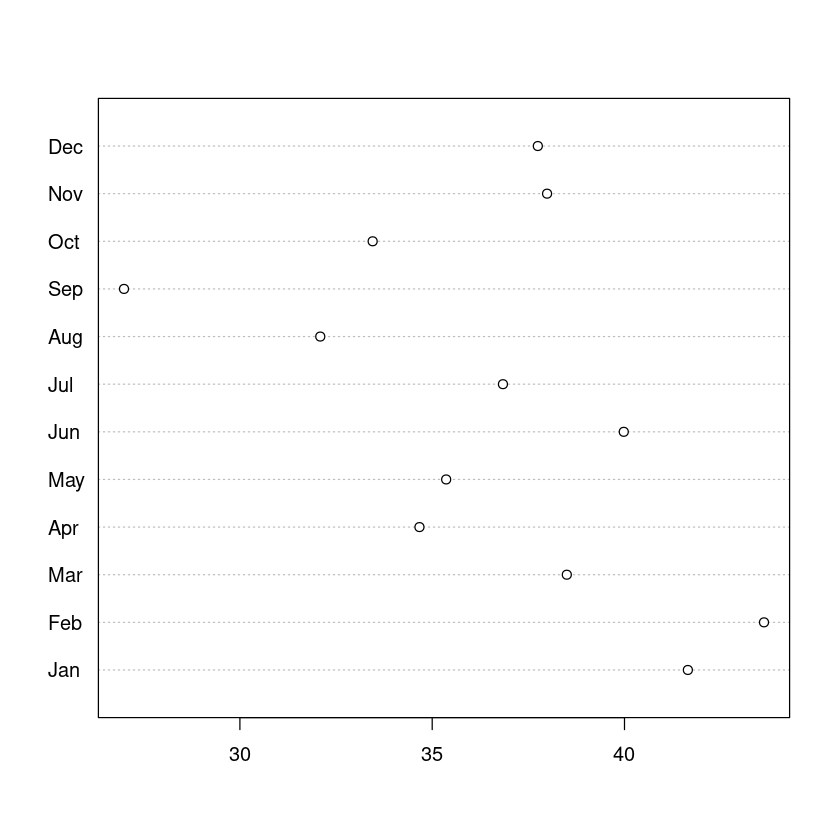

In [71]:
dotchart(myresult02)

Dotchart is better because it's showing the label of each month instead of numbers.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.